## 필요 패키지 로딩

In [2]:
# 기본 패키지
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from IPython.display import display# 출력 예쁘게
import mglearn

In [4]:
# 경고 메세지 무시
import warnings
warnings.filterwarnings(action='ignore')

# 글자 깨짐 방지
mpl.rcParams['font.family'] = 'batang'

## 데이터셋 로딩

In [64]:
from sklearn.datasets import load_iris
iris = load_iris()

### iris dataset 탐색

In [65]:
iris.keys() # bunch 타입이니깐 (dict와 유사)
## target=예측값, DESCR =설명

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
print(iris['DESCR'])  # print해야 보기 좋은 형태로 나옴

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
iris['target_names'], iris['feature_names']

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [12]:
type(iris['data']) # np 2차원 배열

numpy.ndarray

In [13]:
iris['data'].shape

(150, 4)

In [15]:
iris['data'][:5]  # ndarray, head()없음

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [16]:
iris_df = pd.DataFrame(iris['data'], columns = iris.feature_names)
iris_df['species'] = iris.target

In [19]:
iris_df.tail(10) # 섞여 있는 데이터가 아니라서 그냥 분할시 편향이 발생함

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [20]:
# pd, np모드 unique()
## series 단위 작업시 개별건수를 가져오는 value_counts()를 많이 사용
## sort_values, sort_indexs
iris_df['species'].unique()

array([0, 1, 2])

In [21]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
iris_df['species'][:50] = 'setosa'
iris_df['species'][50:100] = 'versicolor'
iris_df['species'][100:] = 'virginica'
iris_df[50:51]
# 정보를 보려고

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
50,7.0,3.2,4.7,1.4,versicolor


In [27]:
# 4개의 특성으로 품종을 분류할 건데 관련이 없다면 분류가 안되거나 정확성이 떨어지겠지

## 분류
### 훈련세트와 테스트세트 분리

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
iris.data, iris.target, random_state=71, test_size=0.2)
# 파이썬은 \넣어서 엔터해줘야함 

In [67]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

### 분류 알고리즘 : 의사결정나무
                     (DecisionTreeClassifier)
- 분류와 회귀에 사용되는 지도학습 알고리즘
- 데이터 특성으로 추론된 결정규칙을 통해 값을 예측
- if-then-else 결정 규칙을 통해 데이터 학습
- 트리의 깊이가 깊을수록 복잡한 모델이 된다.
- 결정 트리의 장점
 - 이해와 해석이 쉽다.
 - 시각화가 용이하다.
 - 많은 데이터의 전처리가 필요하지 않다.
 - 수치형과 범주형 데이터 모두 다룰수 있다.
 
하이퍼파라미터 값변경 또는 교차검증을 통해 정확성을 높이고 이것도 안되면, 여러개의 하이퍼파라미터로(for문) 하면서 best파라미터와 스코어를 알아보자

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtree_cf = DecisionTreeClassifier(random_state =71) # 실전엔 안담음
dtree_cf.fit(X_train, y_train) # 지도학습 파라미터 2개

DecisionTreeClassifier(random_state=71)

### 트리구조를 시각화 하는 패키지 graphviz

In [31]:
import graphviz

In [69]:
from sklearn.tree import export_graphviz # 파일로 내보냄
# export_graphviz(모델객체, 출력 파일명, 결정트리클래스명칭, 피처명칭 ..)
export_graphviz(dtree_cf, out_file='tree.dot', 
                class_names=iris.target_names, 
                feature_names=iris.feature_names, impurity =True,
               filled=True) # 불순도, 색변화

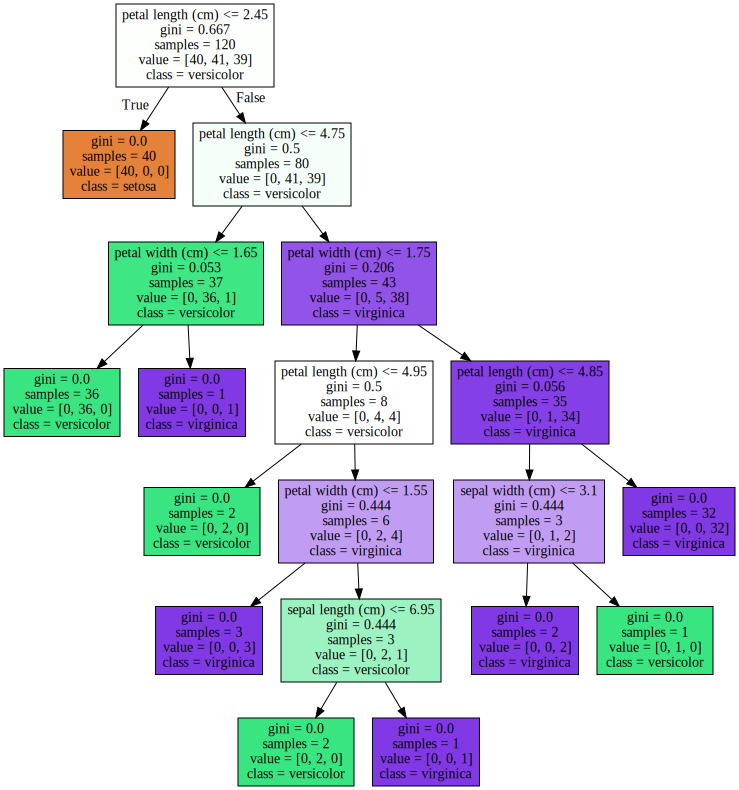

In [33]:
# 내보낸 그림 불러오기 (객체 열고 작업후 닫기까지)
# open(filename, mode) / mode= r(default, 생략가능), w, a
# graphviz 파이썬 래퍼 모듈을 호출해 결정트리 규칙 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
    
src = graphviz.Source(dot_graph) # pdf화
src

In [34]:
# 결정트리를 pdf파일로 보내기위해 사용. : Source.gv, Source.gv.pdf
src.view()

'Source.gv.pdf'

In [70]:
# 평가 점수....
print(dtree_cf.score(X_train, y_train))
print(dtree_cf.score(X_test, y_test))
## 100% 분류될 수 없으니 과대 적합

1.0
0.9333333333333333


### DecisionTree의 중요 하이퍼파라미터 조정

In [71]:
dtree_md = DecisionTreeClassifier(min_samples_split=4,
                                  random_state =71) # 실전엔 안담음
dtree_md.fit(X_train, y_train) 

DecisionTreeClassifier(min_samples_split=4, random_state=71)

In [72]:
print(dtree_md.score(X_train, y_train))
print(dtree_md.score(X_test, y_test))

0.9916666666666667
0.9333333333333333


### feature 별 결정 트리 알고리즘의 중요도

In [73]:
# 모델링 후 생성된 변수
dtree_md.feature_importances_

array([0.        , 0.        , 0.05935853, 0.94064147])

#### feature 뱔 중요도 값 매칭

In [89]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [74]:
for name, value in zip(iris.feature_names, dtree_md.feature_importances_):
    print('{}:{:.3f}'.format(name, value))

sepal length (cm):0.000
sepal width (cm):0.000
petal length (cm):0.059
petal width (cm):0.941


#### feature별 중요도 시각화

<AxesSubplot:>

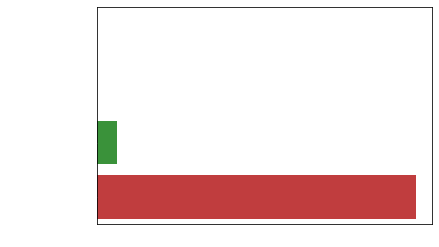

In [75]:
import seaborn as sns
sns.barplot(dtree_md.feature_importances_, iris.feature_names)

### 가지치기(Prunning)
1. Tree Prunning : 의사결정 트리 모델의 과적합(Overfitting)을 줄이고, 일반화 가능성을 증대시킬 수 있는 subtree를 찾는 과정
2. 가지치기 방법
 - cross-validation
 - independent validation set
3. Prunning Logic
 - 가지치기 과정에서는 트리 해당 데이터셋에 과도하게 최적화되지 않도록 결정트리의 최대깊이를 제한하고, leaf node의 최대 개수를 제한한다.
 - 노드를 분할시키기 위해 필요한 '최소한의 데이터 개수'를 지정한다.
 
- 규제를 따로 따로 주면 마지막에 준것만 적용될테고, 한번에주면 더 복잡한 모델이 됨 따라서, 규제를 늘리면서도 일반화가 빠르려면 maxdept나 minsample(영향력이큰) 이 옵션들을 for문으로  

In [76]:
# 결정트리에서 가지치기하는 가장 간단한 방법은 트리의 깊이를 지정하는 것이다.

dtree_md = DecisionTreeClassifier(max_depth=3, random_state =71) # 실전엔 안담음
dtree_md.fit(X_train, y_train) 
print(dtree_md.score(X_train, y_train))
print(dtree_md.score(X_test, y_test))

0.9833333333333333
0.9666666666666667


In [77]:
# max_depth, min_samples_leaf  이 두가지 옵션은 같이 사용하는 게 좋다.
dtree_md = DecisionTreeClassifier(max_depth=3, min_samples_leaf = 6,
                                  random_state =71) # 실전엔 안담음
dtree_md.fit(X_train, y_train) 
print(dtree_md.score(X_train, y_train))
print(dtree_md.score(X_test, y_test))

0.9666666666666667
0.9333333333333333


#### 교차검증(cross-validation)

In [78]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dtree_md, X_train, y_train) # 모델 객체, 트레인데이터, 트레인타깃
scores
# dict형태로 학습시간, 검증시가, 테스트 점수

{'fit_time': array([0.00299406, 0.00091195, 0.00098634, 0.00110316, 0.        ]),
 'score_time': array([0.00023913, 0.0010097 , 0.00099444, 0.        , 0.00110435]),
 'test_score': array([0.91666667, 0.95833333, 0.95833333, 0.91666667, 1.        ])}

In [79]:
np.mean(scores['test_score'])

0.95

In [80]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dtree_md, X_train, y_train, 
                        cv=StratifiedKFold()) # 모델 객체, 트레인데이터, 트레인타깃
np.mean(scores['test_score'])

0.95

#### 그리드 서치(Grid Search)
- 결정트리의 하이퍼파라미터 값을 바꿔가며 가장 좋은 성능이 나오는 모델을 찾는 작업
- 테스트 세트를 사용하지 않고 교차 검증을 통해 좋은 모델을 고르면 된다.
- GridSearchCV

In [81]:
from sklearn.model_selection import GridSearchCV
# 지정한 파라미터를 병행하여 학습을 돌려봐라(총 9번)
model = DecisionTreeClassifier(random_state = 71)
# 하이퍼파라미터 들
params = {
    'max_depth':[2,3,4,5,6,None],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
    'min_samples_split':[2,3,4,5,6,7,8,9,10]
}
# gridSearch
gs = GridSearchCV(model, param_grid=params, cv = 3,
                  refit=True, n_jobs=-1 )
## 병행처리시 cpu의 처리수 지정1(할단된것만) -1(시스템 모든거 끌어써)
gs.fit(X_train, y_train) # fitting

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=71), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [82]:
model = gs.best_estimator_
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9833333333333333
0.9666666666666667


In [83]:
# 그리드 서치를 통해 찾은 최적의 매개변수
print(gs.best_params_)
print(gs.best_score_)
## 이값은 위에 estimator값 보다 작아야 함

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
0.9666666666666667


In [84]:
# 최상의 교차검증 점수
np.max(gs.cv_results_['mean_test_score'])

0.9666666666666667

In [85]:
model = DecisionTreeClassifier(max_depth=3,
                               min_samples_leaf=1,
                               min_samples_split=2,
                               random_state =71) # 실전엔 안담음
model.fit(X_train, y_train) 
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9833333333333333
0.9666666666666667
